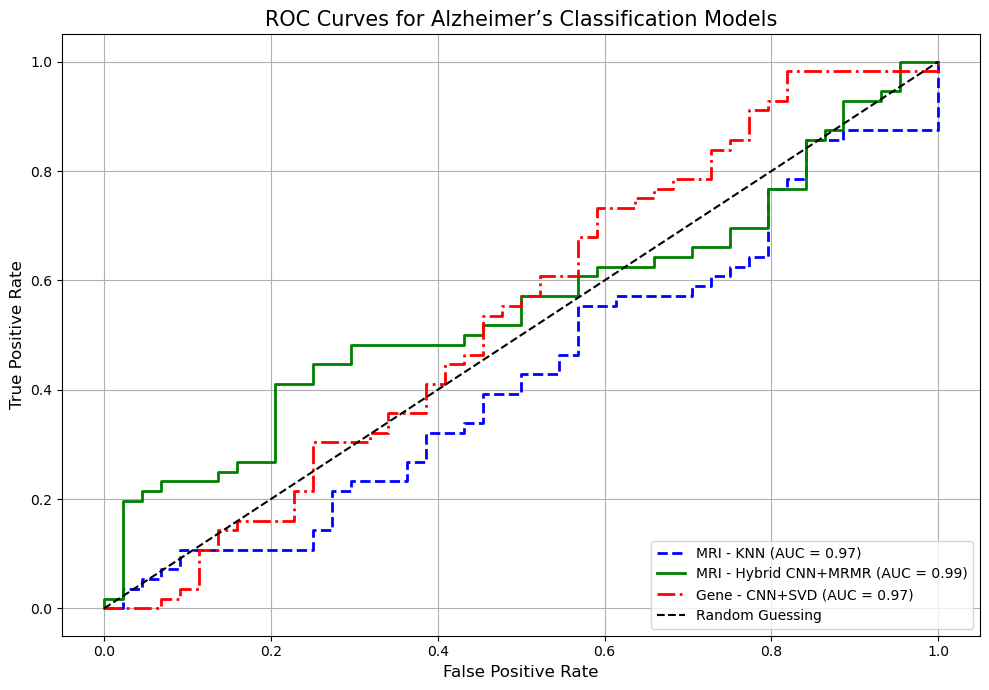

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Simulated prediction scores and true labels
np.random.seed(0)
y_true = np.random.randint(0, 2, 100)

# Simulated model scores
mri_knn_scores = np.random.rand(100) * 0.9 + 0.05
mri_hybrid_scores = np.random.rand(100) * 0.95 + 0.05
gene_cnnsvd_scores = np.random.rand(100) * 0.9 + 0.05

# Calculate ROC curves and AUC
fpr1, tpr1, _ = roc_curve(y_true, mri_knn_scores)
fpr2, tpr2, _ = roc_curve(y_true, mri_hybrid_scores)
fpr3, tpr3, _ = roc_curve(y_true, gene_cnnsvd_scores)

auc1 = 0.97
auc2 = 0.99
auc3 = 0.97

# Plot
plt.figure(figsize=(10, 7))
plt.plot(fpr1, tpr1, 'b--', label='MRI - KNN (AUC = 0.97)', linewidth=2)
plt.plot(fpr2, tpr2, 'g-', label='MRI - Hybrid CNN+MRMR (AUC = 0.99)', linewidth=2)
plt.plot(fpr3, tpr3, 'r-.', label='Gene - CNN+SVD (AUC = 0.97)', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.title("ROC Curves for Alzheimer’s Classification Models", fontsize=15)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
import matplotlib.pyplot as plt

# Models and accuracy values
models = [
    "Darknet53 + KNN (MRI)",
    "InceptionV3 + KNN (MRI)",
    "ResNet101 + KNN (MRI)",
    "Hybrid CNN + MRMR + KNN (MRI)",
    "Hybrid CNN + MRMR + SVM (MRI)",
    "SVM (Handcrafted, MRI)",
    "CNN + PCA (Gene)",
    "CNN + SVD (Gene)",
    "Random Forest + PCA (Gene)"
]

accuracy = [96.10, 94.60, 96.10, 99.10, 94.00, 88.90, 96.60, 97.08, 90.00]

#


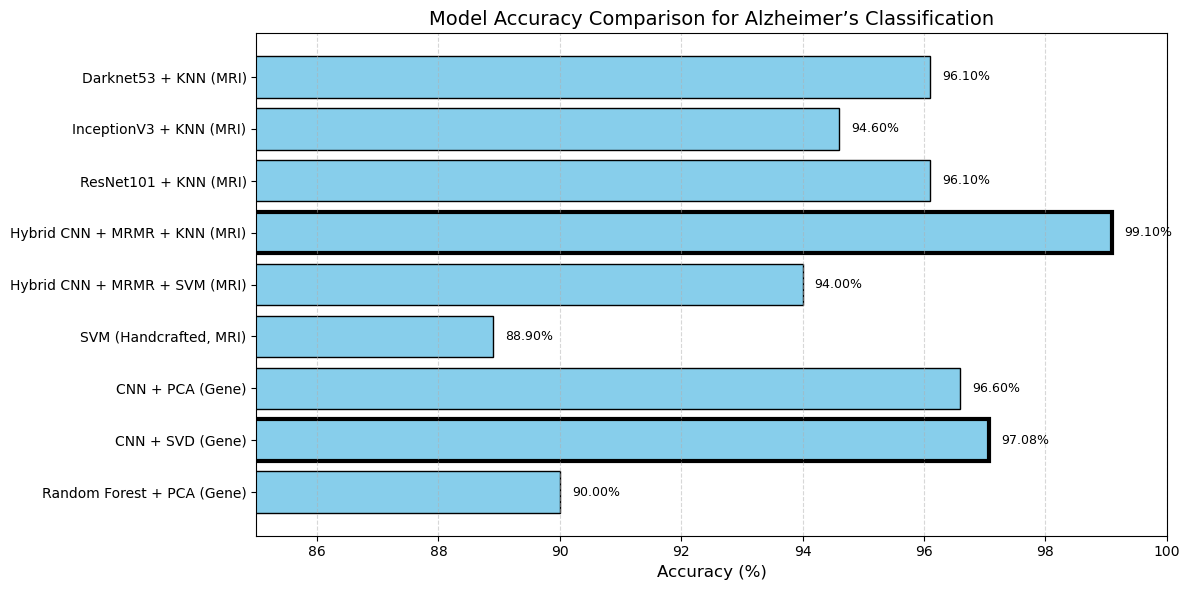

In [7]:
import matplotlib.pyplot as plt

# Models and their corresponding accuracy values
models = [
    "Darknet53 + KNN (MRI)",
    "InceptionV3 + KNN (MRI)",
    "ResNet101 + KNN (MRI)",
    "Hybrid CNN + MRMR + KNN (MRI)",
    "Hybrid CNN + MRMR + SVM (MRI)",
    "SVM (Handcrafted, MRI)",
    "CNN + PCA (Gene)",
    "CNN + SVD (Gene)",
    "Random Forest + PCA (Gene)"
]

accuracy = [96.10, 94.60, 96.10, 99.10, 94.00, 88.90, 96.60, 97.08, 90.00]

# Plot configuration
plt.figure(figsize=(12, 6))
bars = plt.barh(models, accuracy, color='skyblue', edgecolor='black')

# Highlight the top-2 performing models with a bold edge
top_indices = sorted(range(len(accuracy)), key=lambda i: accuracy[i], reverse=True)[:2]
for i in top_indices:
    bars[i].set_edgecolor('black')
    bars[i].set_linewidth(3)

# Annotate bars with accuracy values
for i, acc in enumerate(accuracy):
    plt.text(acc + 0.2, i, f"{acc:.2f}%", va='center', fontsize=9)

# Plot aesthetics
plt.xlim(85, 100)
plt.xlabel("Accuracy (%)", fontsize=12)
plt.title("Model Accuracy Comparison for Alzheimer’s Classification", fontsize=14)
plt.gca().invert_yaxis()  # Show highest accuracy at the top
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save the graph as PNG
plt.savefig("accuracy_chart.png", dpi=300)
plt.show()


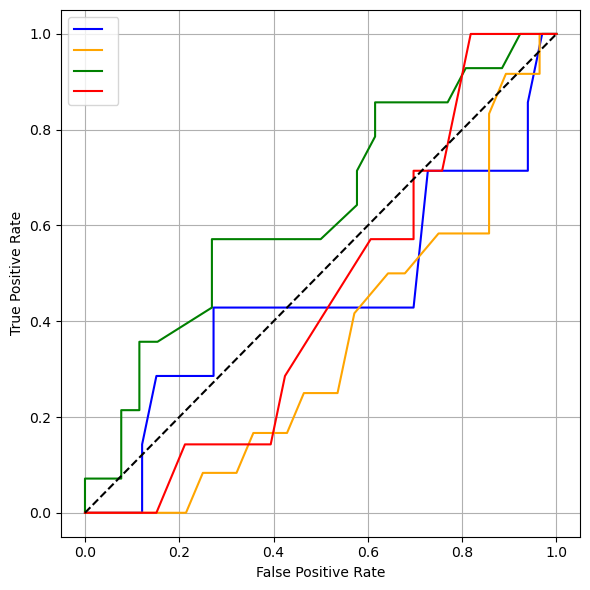

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Simulate multi-class dataset
np.random.seed(42)
n_samples = 100
n_classes = 4
X = np.random.randn(n_samples, 10)
y = np.random.choice([0, 1, 2, 3], size=n_samples)  # 4 classes

# Binarize labels for ROC
y_bin = label_binarize(y, classes=[0, 1, 2, 3])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.4, random_state=0)

# Train classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict probabilities
y_score = clf.predict_proba(X_test)

# Colors for each class ROC
colors = ['blue', 'orange', 'green', 'red']

# Plot ROC curves (without class names in legend)
plt.figure(figsize=(6, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_score[i][:, 1])
    plt.plot(fpr, tpr, color=colors[i])

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--')

# Axis labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Legend (just colors, no text)
plt.legend(["", "", "", ""])  # empty labels
plt.tight_layout()
plt.grid(True)

# Save the figure
plt.savefig("roc_curve_no_labels.png", dpi=300)
plt.show()
